# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import AutoMinorLocator

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_temp = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = mars_temp.find_all('tr')
rows

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
mars_t = []
html = browser.html
mars_soup = soup(html, 'html.parser')
table = mars_soup.find('table', class_="table")
table_rows = table.find_all('tr')
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    mars_t.append(row)
   # print(row)

df = pd.DataFrame(mars_t, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
print(df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
result = df.dtypes
print(result)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [42]:
# Change data types for data analysis
df.iloc[:, 0] = df.iloc[:, 0].astype(float)
df[["terrestrial_date"]] = df[["terrestrial_date"]].apply(pd.to_datetime)
#df.iloc[:, 2:5] = df.iloc[: 2:5].astype('int64')
df.iloc[:, -2:] = df.iloc[:, -2:].astype(float)



In [43]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   float64       
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               0 non-null      object        
 3   ls                0 non-null      object        
 4   month             0 non-null      object        
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 102.3+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
# 1. How many months are there on Mars?
mars_months = np.unique(df['month'])
mars_months

TypeError: '<' not supported between instances of 'float' and 'NaTType'

In [47]:
# 2. How many Martian days' worth of data are there?
mars_days = np.unique(df['sol'])
mars_days
#print(mars_days['sol'].count())

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [82]:
# 3. What is the average low temperature by month?
df_month = df.groupby(df["terrestrial_date"].dt.month)["min_temp"].mean()
df_month

terrestrial_date
1.0    -76.988506
2.0    -76.909091
3.0    -77.349206
4.0    -76.098592
5.0    -75.573427
6.0    -75.671233
7.0    -76.177305
8.0    -75.851613
9.0    -75.816092
10.0   -75.685083
11.0   -75.537975
12.0   -75.994220
Name: min_temp, dtype: float64

Text(0, 0.5, 'min_temp')

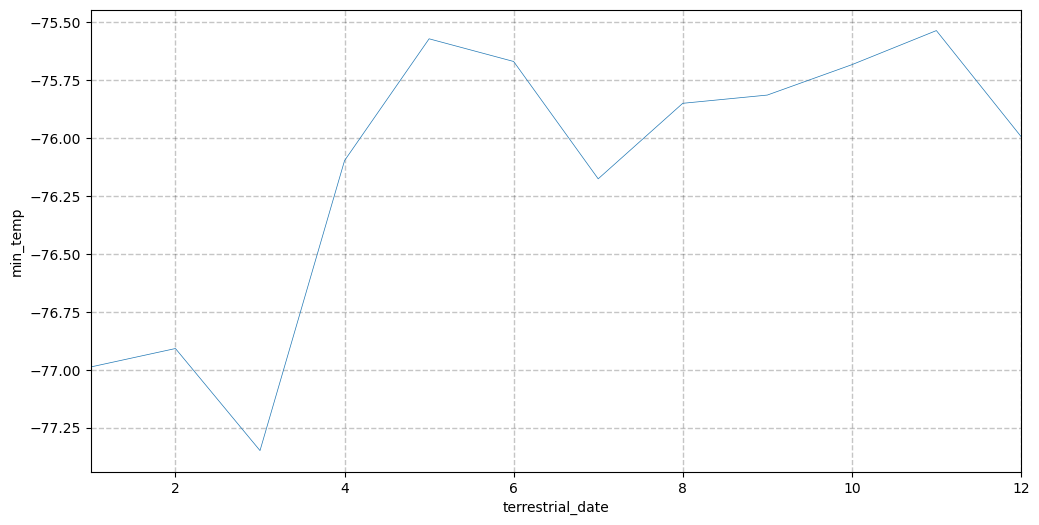

In [83]:
# Plot the average temperature by month
df_month.plot(figsize=(12, 6), linewidth=0.5)
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("min_temp")
#sns.despine()

In [93]:
# Which month, on average, has the lowest temperature? The highest? 
print(df["terrestrial_date"], df['min_temp'].min())

0             NaT
1      2012-08-16
2      2012-08-17
3      2012-08-18
4      2012-08-19
          ...    
1863   2018-02-23
1864   2018-02-24
1865   2018-02-25
1866   2018-02-26
1867   2018-02-27
Name: terrestrial_date, Length: 1868, dtype: datetime64[ns] -90.0


In [96]:
# 4. Average pressure by Martian month
df_month = df.groupby(df["terrestrial_date"].dt.month)["pressure"].mean()
df_month

terrestrial_date
1.0     861.258621
2.0     837.967532
3.0     827.722222
4.0     817.676056
5.0     803.601399
6.0     807.910959
7.0     822.510638
8.0     829.606452
9.0     845.586207
10.0    865.475138
11.0    875.481013
12.0    875.260116
Name: pressure, dtype: float64

Text(0, 0.5, 'pressure')

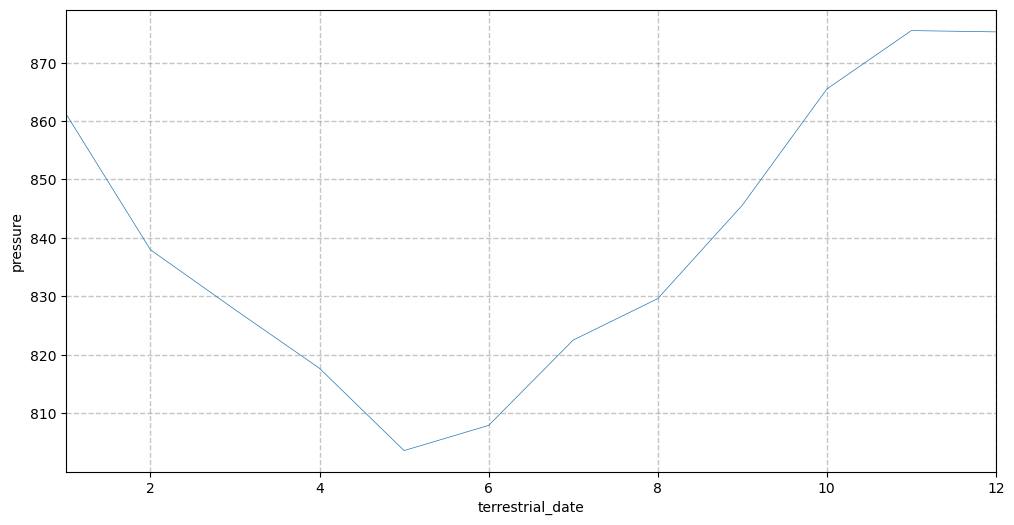

In [97]:
# Plot the average pressure by month
df_month.plot(figsize=(12, 6), linewidth=0.5)
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("pressure")

In [104]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [112]:
# Write the data to a CSV
import os
os.makedirs('resources', exist_ok=True)  
df.to_csv('resources/mars_data.csv')

In [113]:
browser.quit()